<a href="https://colab.research.google.com/github/sundheeprk/MLP/blob/main/wine_data_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 1: Data Loading

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

data = pd.read_csv(data_url, sep=';')

## Step 2: Exploring the Data

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
features = data.columns[:-1].values
labels = [data.columns[-1]]

print('Feature list:', features)
print('Label:', labels)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


In [5]:
# lets use info() method to get quick description of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# in order to understand nature of numeric attributes, we use describe() method
data. describe()
# this one prints count and statistical properties mean, standard-deviations and quartiles

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
# high quality value -> better quality of wine
# there are lots of samples of average wines than good or poor quality ones
# many examples with quality = 5 or 6
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Visualization

Text(0, 0.5, 'Count')

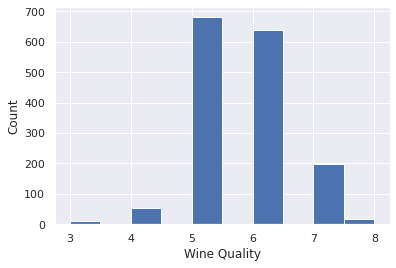

In [8]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

Text(0, 0.5, 'count')

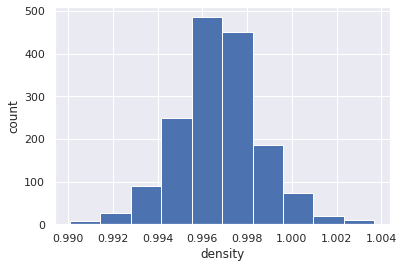

In [9]:
data.density.hist()
plt.xlabel('density')
plt.ylabel('count')

Text(0, 0.5, 'count')

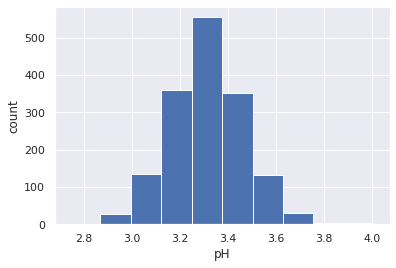

In [10]:
data.pH.hist()
plt.xlabel('pH')
plt.ylabel('count')

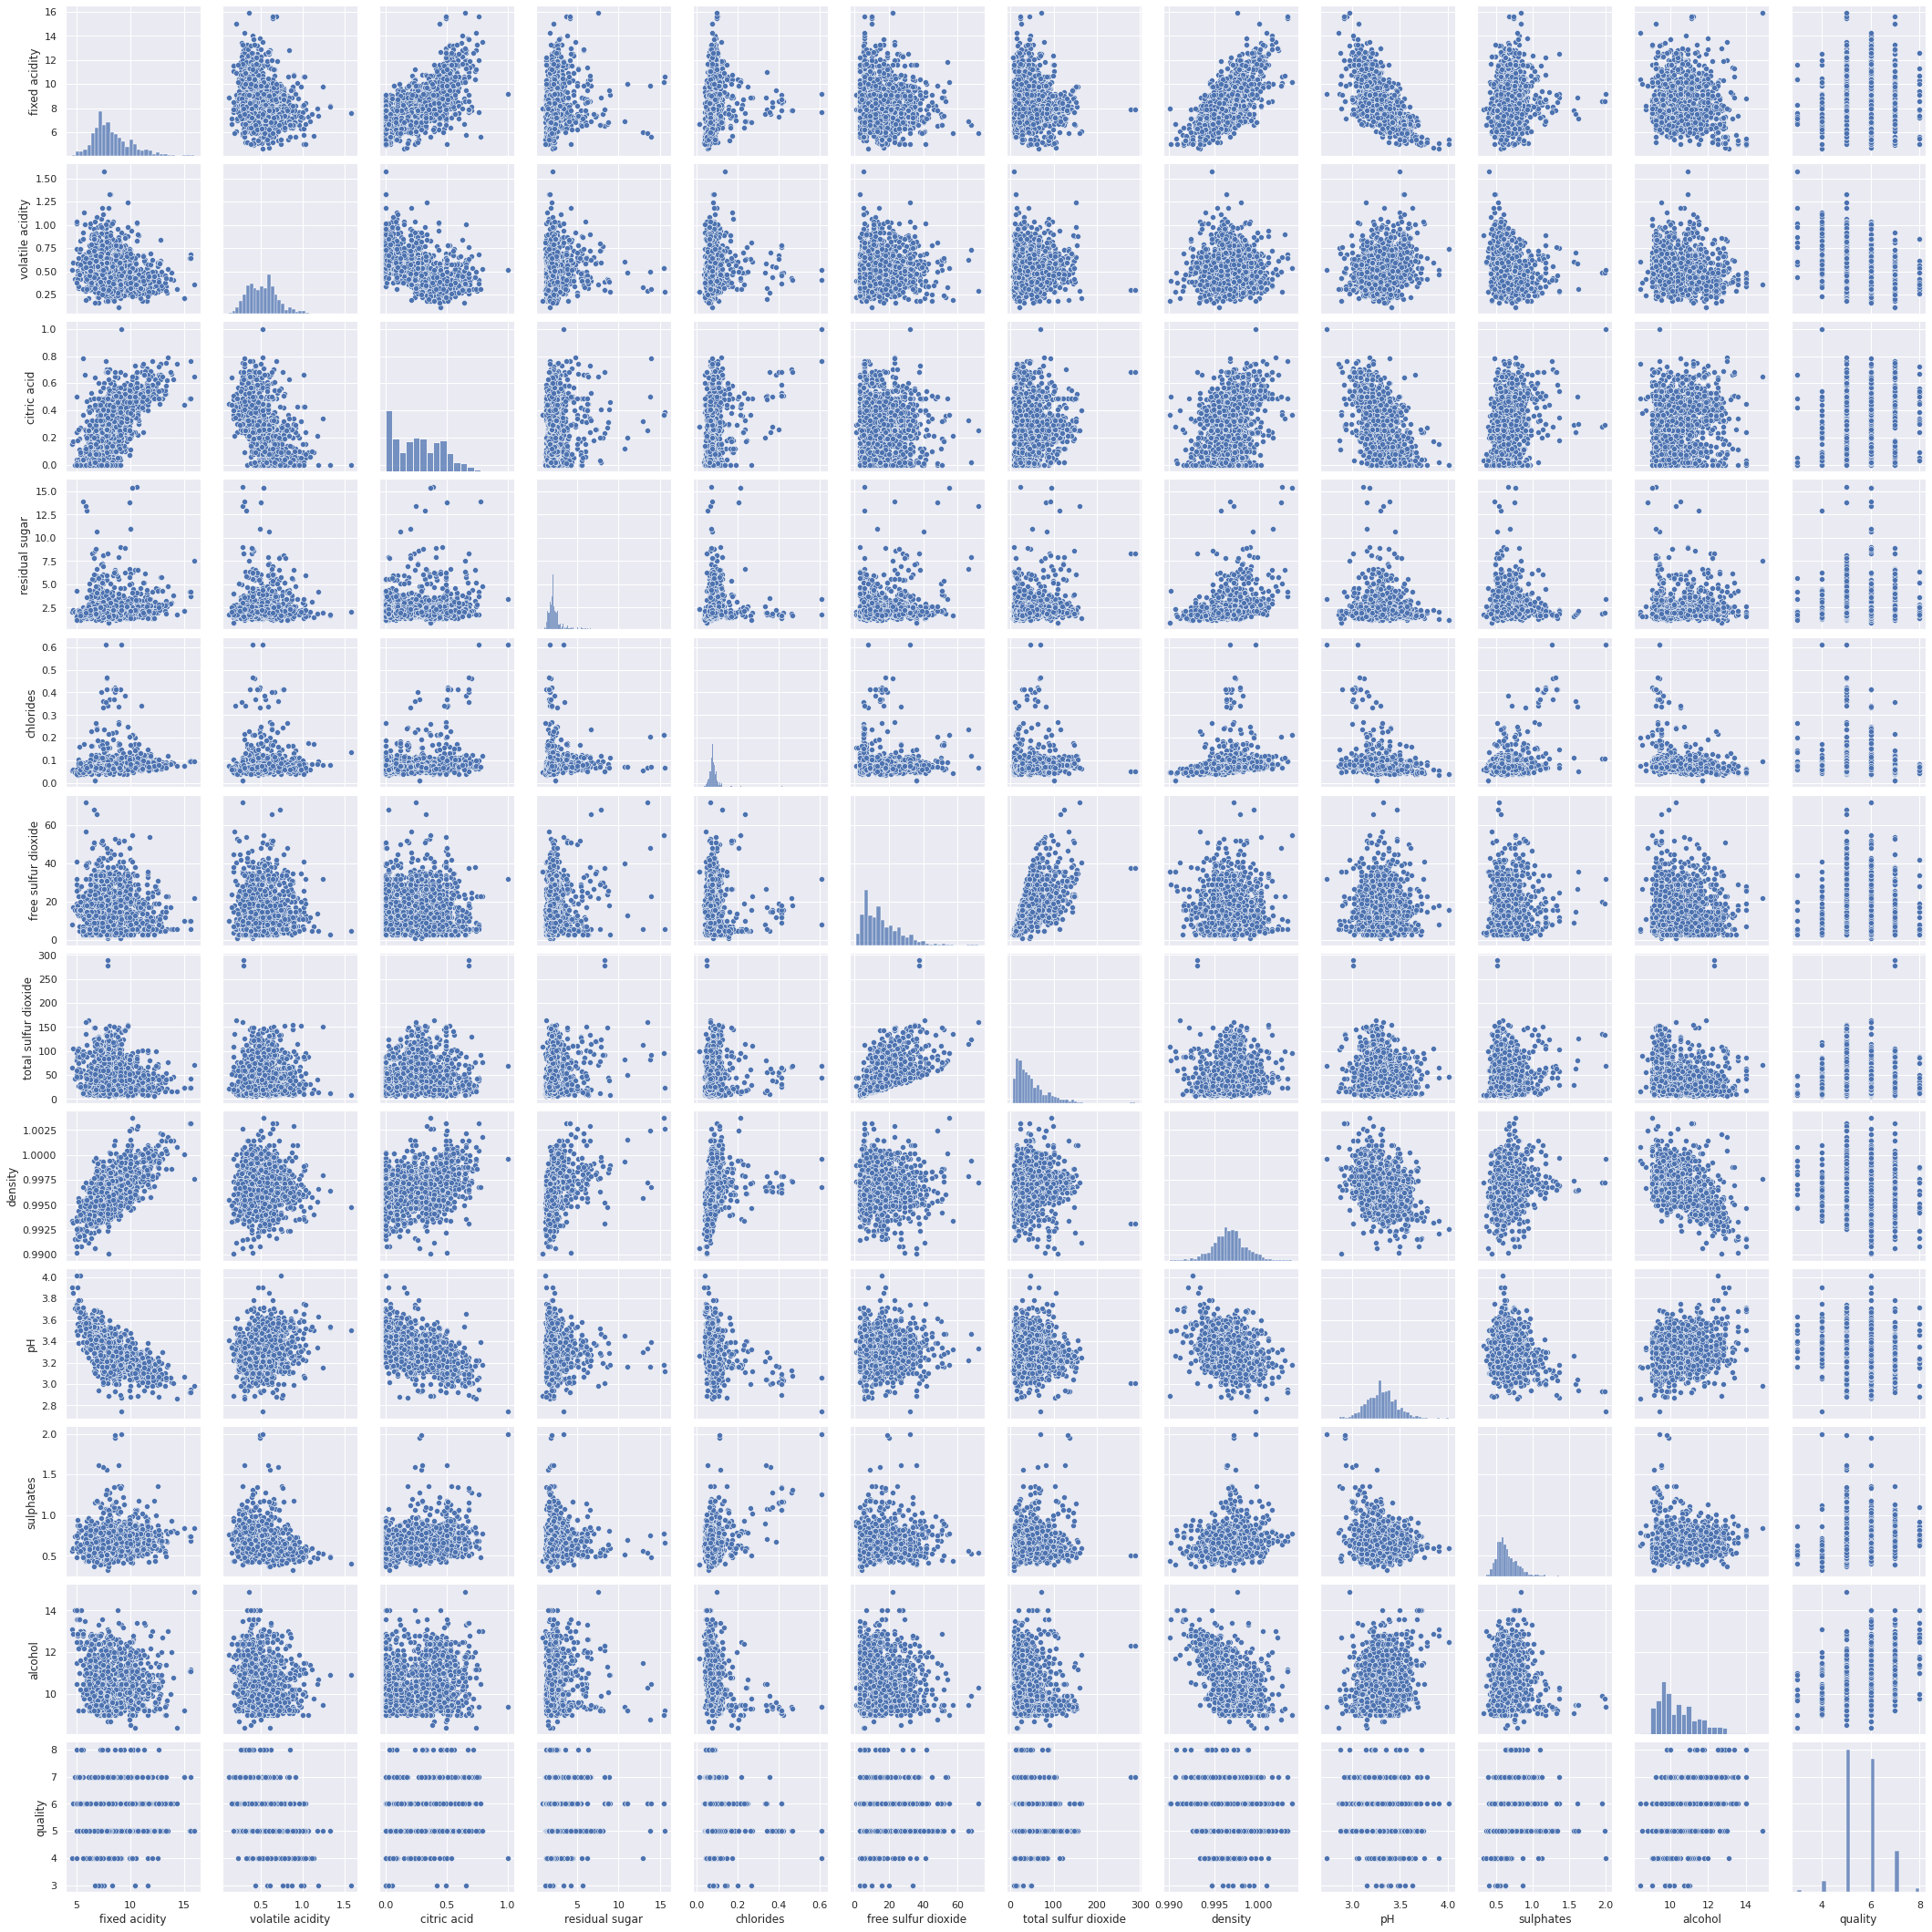

In [11]:
sns.pairplot(data)

## Train - Test split

Writing a function to split the data into training and test. Make sure to set the seed so that we get the same test set in the next run.

In [12]:
def split_train_test(data, test_ratio):
  # set the random seed
  np.random.seed(42)

  # shuffle the dataset
  shuffled_indices = np.random.permutation(len(data))

  # calculate the size of the test set.
  test_set_size = int(len(data) * test_ratio)

  # split dataset to get training and test sets
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(data, 0.2)

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

### Stratified Shuffle Split

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['quality']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


In [16]:
strat_dist = strat_test_set['quality'].value_counts() / len(strat_test_set)

In [17]:
overall_dist = data['quality'].value_counts() / len(data)

## Distribution-Comparison

In [18]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100 * (dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [19]:
dist_comparison

overall  stratified  diff(s-o)  diff(s-o)_pct
5  0.425891    0.425000  -0.000891      -0.209251
6  0.398999    0.400000   0.001001       0.250784
7  0.124453    0.125000   0.000547       0.439698
4  0.033146    0.034375   0.001229       3.708726
8  0.011257    0.009375  -0.001882     -16.718750
3  0.006254    0.006250  -0.000004      -0.062500

In [20]:
# lets contrast this with random sampling
random_dist = test_set['quality'].value_counts()/ len(test_set)
random_dist

6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: quality, dtype: float64

In [25]:
dist_comparison['random'] = random_dist
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(r-o)_pct'] = 100 * (dist_comparison['diff(r-o)']/dist_comparison['overall'])

In [26]:
dist_comparison.loc[:, ['diff(s-o)_pct', 'diff(r-o)_pct']]

diff(s-o)_pct  diff(r-o)_pct
5      -0.209251      -4.611784
6       0.250784       3.383621
7       0.439698       5.461683
4       3.708726      -5.719340
8     -16.718750      38.802083
3      -0.062500     -50.031250

## Step 3 : Data Visualization



*   performed on training set in case of large data set.
*   sample examples to form exploration set


*   Enables to understand features and their relationship among themselves and with output labels.
*   In our case we have a small training data and we use it all for data exploration. There is no need to create a separate exploration set.


*   It's good idea to create a copy of the training set so that we can freely manipulate it without worrying about any manipulation in the original set.








In [27]:
exploration_set = strat_train_set.copy()

#### Scatter Plot

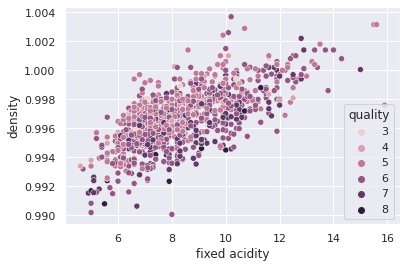

In [28]:
sns.scatterplot(x='fixed acidity', y = 'density', hue='quality',
                data=exploration_set)

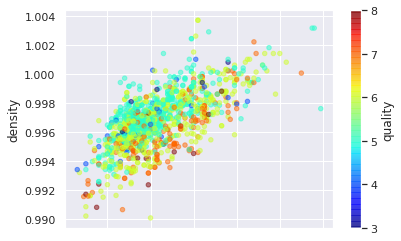

In [29]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density',
                     alpha=0.5, c='quality', cmap=plt.get_cmap('jet'))

#### 2. Standard correlation coefficient between features



*   Ranges between -1 to +1
*   Correlation = +1 means Strong positive correlation between features


*   Correlation = -1 means Strong negative correlation between features
*   Correlation = 0 means No linear correlation between features


*   Visualizaiton with heatmap only captures linear relationship between features
*   For non-linear relationship, we use rank correlation







In [30]:
corr_matrix = exploration_set.corr()

Checking features that are correlated with the label,i.e quality in our case.

In [31]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.481197
sulphates               0.228050
citric acid             0.210802
fixed acidity           0.107940
residual sugar          0.003710
free sulfur dioxide    -0.048291
pH                     -0.052063
chlorides              -0.120231
density                -0.193009
total sulfur dioxide   -0.194511
volatile acidity       -0.383249
Name: quality, dtype: float64

Notice that quality has strong positive correlation with alcohol content [0.48] and strong negative correlation with volitile acidity [-0.38]

Visualization of correlation matix using Heatmap :

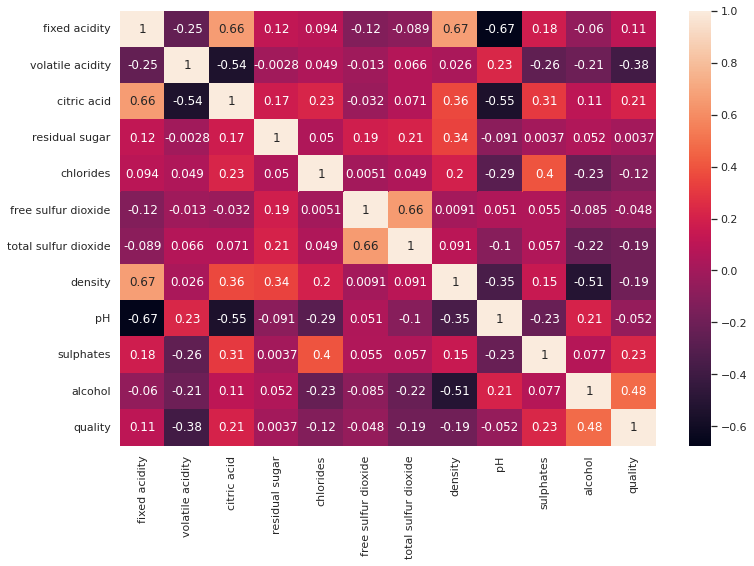

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, yticklabels=True, cbar=True, annot=True)

We can notice:


*   The correlation coefficient on diagonal is +1
*   Darker colors represent negative correlations, while fainer colors denote positive correlations. For example :

> *   citric acid and fixed acidity have strong positive correlation.
*   pH and fixed acidity have strong negative correlation


Another option to visualize the relationship between the feature is with scatter matrix.







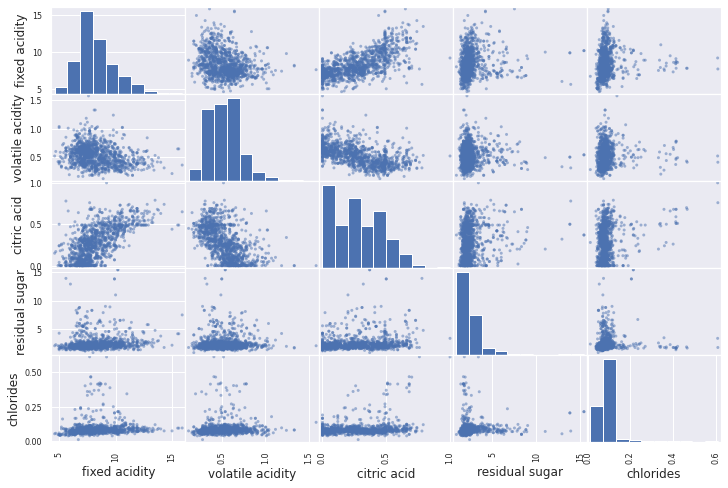

In [33]:
from pandas.plotting import scatter_matrix
attribute_list = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides']

scatter_matrix(exploration_set[attribute_list], figsize=(12, 8))
plt.show()

For convenience of visualization, we show 

it for a small number of attributes/features.

Similar analysis can be carried out with combined features-features that are derived from the original features.

Notes of wisdom



1.   Visualization and data exploration do not have to be absolutely thorough.

2.   Objective is to get quick insight into features and its relatioship with other features and labels.


1.   Exploration is an iterative process: Once we build model and obtain more insights, we can come back to this step.



## Step 4 : Prepare data for ML algorithm 
We often need to preprocess the data before using it for model building due to variety of reasons.

*   Due to errors in data capture, data may contain outliers or missing values
*   Different features may be at different scales.


*   The current data distribution is not exactly amenable to learning.

Typical steps in data preprocessing are as follows :



1.   Separate features and labels.
2.   Handling missing values and outliers


1.   Feature scaling to bring all features on the same scale.
2.   Applying certain transformations like log, square root on the features

It is a good practive to make a copy of the data and apply preprocessing on that copy.

This ensures that in case something goes wrong, we will at least have original copy of the data intact.








1. Separation of features and labels

In [34]:
#  Copy all features leaving aside the label.
wine_features = strat_train_set.drop('quality', axis=1)
wine_labels = strat_train_set['quality'].copy()

#### Data cleaning

2.A. Handling missing values


First check if there are any missing values in feature set. One way to find that out is column-wise.


In [35]:
# counts the number of Nan in each column of wine_features
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In case, we have non-zero numbers in any columns, we have a problem of missing values


*   These values are missing due to errors in recording or they do not exist.
*   if they are not recorded:



> *   use imputation technique to fill up the missing values
*   Drop the rows containig missing values




*   if they do exists, it is better to keep it as NaN.


Sklearn provides the following methods to drop rows conatining missing values:


1.   dropna()
2.   drop()


It provides SimpleImputer class for filling up missing values with say, median value.


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

imputer.fit(wine_features)

SimpleImputer(strategy='median')

In case, the features contains non-numeric attributes, they need to be dropped before calling the fit method on imputer object.

Let's check the statistics learnt by the imputer on the training set:

In [37]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

Note that these are median values for each feature. We can cross-check it by calculating median on the feature set:

In [38]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

Finally we use the trained imputer to transform the training set such that the missing values are replaced by the medians.

In [39]:
transf_features = imputer.transform(wine_features)
transf_features.shape

(1279, 11)

This returns a Numpy array and we can convert it to the dataframe if needed:

In [40]:
wine_features_transf = pd.DataFrame(transf_features, columns=wine_features.columns)

In [41]:
wine_features_transf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.7             0.855         0.02             1.9      0.064   
1            6.9             0.630         0.33             6.7      0.235   
2           11.9             0.570         0.50             2.6      0.082   
3            8.6             0.470         0.27             2.3      0.055   
4           10.4             0.260         0.48             1.9      0.066   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 29.0                  38.0  0.99472  3.30       0.56   
1                 66.0                 115.0  0.99787  3.22       0.56   
2                  6.0                  32.0  1.00060  3.12       0.78   
3                 14.0                  28.0  0.99516  3.18       0.80   
4                  6.0                  10.0  0.99724  3.33       0.87   

   alcohol  
0    10.75  
1     9.50  
2    10.70  
3    11.20  
4    10.90

##### 2.B. Handling Text and categorical attributes

#### ORDINAL ENCODING



*   Converts categories to numbers
*   Call fit_transform() method on ordinal_encoder object to convert text to numbers.

*   The list of categories can be obtained via categories_ instance variable.


One issue with this representation is that the ML algorithm would assume that the two nearby values are closer than the distinct ones

In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder  = OrdinalEncoder()

#### ONE-HOT ENCODING:


*   Converts categorical variables to binary variables.
*   In other words, we create one binary feature per category - the feature value is 1 when the category is present, else it is 0.


1.   One feature is 1 (hot) and the rest are 0 (cold).
2.   The new features are referred to as dummy features.


Scikt-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors.

In [43]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()



*   We need to call fit_transform() method on OneHotEncoder object.
*   The output is a SciPy sparse matrix rather than NumPy array. This enables us to save space when we have a huge nuber of categories.


*   In case we want to convert it to dense reprersentation, we can do with toarray() method.
*   The list of categories can be obtained via categories_ instance variable

*   As we observed that when the number of categories are very large, the one-hot encoding would result in a very large number of features.
*   This can be addressed with one of the following approaches:



> *   Replace with categorical numberical features
*   Convert into low-dimensional learnable vectors called embeddings

#### 3. Feature Scaling



*   Most ML algorithms do not perform well when input features are on very different scales.
*   Scaling of target label is generally not required

#### 3.A. Min-Max Scaling or Normalization


*   Scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.
*   We subtract minimum value of a feature from the current value and divide it by the difference between minimum and the maximum value of that feature.


*   Scikit-Lean provides MinMaxScalar transformer for this.
*   One can specify hyperparameter feature_range to specify the range of the feature


#### 3.B. Standardization


*   Scaling technique where the values are centered around the mean with a unit standard deviation.
*   We subtract mean value of each featurer from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.


*   While normalizationbounds values between 0 and 1, standardization does not bound values to a specific range.
*   Standardization is less affected by the outliers compared to the normalization.

*   Scikit-Learn provides StandardScalar transformation for features standardization.
*   Note that all these transformers are learnt on the traning data and then applied on the training and test data to transform them.

**Never learn these transformers on the full dataset
**




### Transformation Pipeline
Scikit-Learn provides a pipeline class to line up transformations in an intended order

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

estimators = [('SimpleImputer', SimpleImputer()),
              ('StandardScaler', StandardScaler())]

pipe = Pipeline(steps=estimators)
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardscaler', StandardScaler())])

wine_features_tr = transform_pipeline.fit_transform(wine_features)            

Let's Understand what is happening here:


*   Pipeline has a sequence of transformations-missing value imputation followed by standardization.
*   Each step is the sequence is define by name,estimator pair.

*   Each name should be unique and should not contain __ (double underscore)
*   The output of one step is passed on the next one in sequence until it reaches the last step.

*   Here the pipeline first performs imputation of missing values and its result is passed for standardization.

*   The pipeline exposes the same method as the final estimator



> Here StandardScalar is the last estimator and since it is a transformer, we call fit_transform() method on the Pipleline object.

   









#### Transforming Mixed Features


*   The real world data has both categorical as well as numerical features and we need to apply different transformations to them.
*   Scikit-Learn introduced ColumnTransformer class to handle this.



In [45]:
from sklearn.compose import ColumnTransformer



*   The ColumnTransformer applies each transformation to the appropriate columns and then concatenates the outputs along the columns.
*   Note that all transformers must return the same number of rows.


*   The numeric transformers return dense matrix while the categorical ones return sparse matrix.
*   The ColumnTransformer automatically determines the type of the output based on the density of resulting matrix.





# STEP 5: Select and Train ML model

It is a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()



*   Now that we have a working model of a regression, let's evaluate performance of the model on training as well as test sets.
*   For regression models, we use mean squared error as an evaluation measure.



In [47]:
from sklearn.metrics import mean_squared_error

quality_pred = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_pred)

0.4206571060060277

Let's evaluate performance on the test set.

We need to first apply transformation on the test set and then apply the model prediction function.

In [48]:
# copy all features leaving aside the label
wine_features_test = strat_test_set.drop('quality', axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict function and calculate MSE
quality_test_pred = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_pred)

0.3975913087501518

Let's visualize the error between the actual and predicted values.

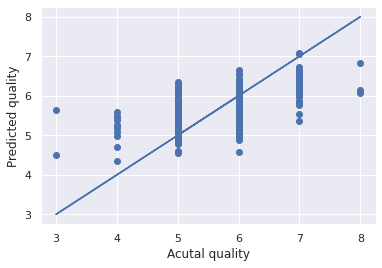

In [49]:
plt.scatter(wine_labels_test, quality_test_pred)
plt.plot(wine_labels_test, wine_labels_test, 'b-')
plt.xlabel('Acutal quality')
plt.ylabel('Predicted quality')
plt.show()